In [ ]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [ ]:
import numpy as np

In [ ]:
!git clone https://github.com/JkbRnc/Data_Generators.git

Cloning into 'Data_Generators'...
remote: Enumerating objects: 126, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 126 (delta 42), reused 93 (delta 25), pack-reused 0
Receiving objects: 100% (126/126), 1.09 MiB | 13.34 MiB/s, done.
Resolving deltas: 100% (42/42), done.


In [ ]:
from Data_Generators.generators.vae import VAE
from Data_Generators.evaluate.eval import evaluate_randomforest, evaluate_knn, create_statistics, distance

# Iris

In [ ]:
iris = pd.read_csv('https://raw.githubusercontent.com/yangzhangalmo/pytorch-iris/master/dataset/iris.csv', sep=',')

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_vae = VAE(latent_dim=16, e_params=[128], d_params=[128], lr =0.001, num_epochs=1000)

In [ ]:
iris_vae.fit(iris, categorical_columns=['species'])

Epoch: 0, loss: 1065.56982421875
Epoch: 10, loss: 785.3576049804688
Epoch: 20, loss: 732.5347900390625
Epoch: 30, loss: 670.2091064453125
Epoch: 40, loss: 633.0801391601562
Epoch: 50, loss: 569.8486328125
Epoch: 60, loss: 536.2130737304688
Epoch: 70, loss: 560.8370361328125
Epoch: 80, loss: 563.6553344726562
Epoch: 90, loss: 529.0680541992188
Epoch: 100, loss: 519.0699462890625
Epoch: 110, loss: 513.5447998046875
Epoch: 120, loss: 537.6538696289062
Epoch: 130, loss: 515.0887451171875
Epoch: 140, loss: 466.8352966308594
Epoch: 150, loss: 496.7919616699219
Epoch: 160, loss: 522.612548828125
Epoch: 170, loss: 467.9749450683594
Epoch: 180, loss: 525.6285400390625
Epoch: 190, loss: 510.8084716796875
Epoch: 200, loss: 458.35992431640625
Epoch: 210, loss: 472.35986328125
Epoch: 220, loss: 474.51385498046875
Epoch: 230, loss: 450.61700439453125
Epoch: 240, loss: 456.87359619140625
Epoch: 250, loss: 479.3088073730469
Epoch: 260, loss: 474.1686096191406
Epoch: 270, loss: 449.371337890625
Epoch: 

In [ ]:
samples = iris_vae.sample()

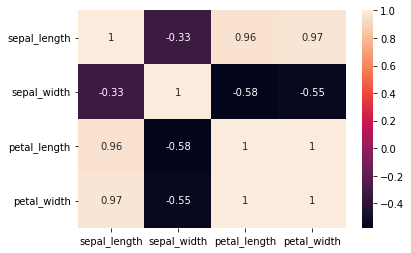

In [ ]:
s = samples
df = pd.DataFrame(samples, columns=iris_vae.columns)
df2 = df.drop(['species'], axis=1).astype(float)
corrMatrix_iris = df2.corr()
sn.heatmap(corrMatrix_iris, annot=True)
plt.show()

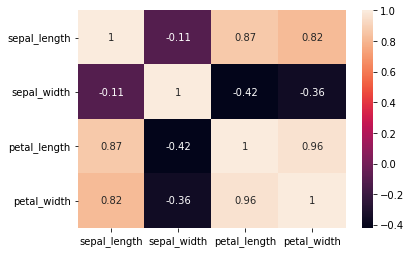

In [ ]:
sn.heatmap(iris.drop(['species'], axis=1).corr(), annot=True)
plt.show()

In [ ]:
og = iris.drop(['species'],axis=1)
new = pd.DataFrame(samples, columns=iris.columns).drop(['species'],axis=1).astype(float)

In [ ]:
distance(og.cov(), new.cov())

0.06250404626053802

In [ ]:
df = pd.DataFrame(samples, columns=iris.columns)
train_data = df.drop(['species'],axis=1).astype(float)
train_labels = df['species']
test_data = iris.drop(['species'],axis=1).astype(float)
test_labels = iris['species']

In [ ]:
rfc_iris = RandomForestClassifier()
rfc_iris.fit(train_data, train_labels)

RandomForestClassifier()

In [ ]:
rfc_iris.score(test_data, test_labels)

0.92

# Beans dataset

In [ ]:
url = 'https://raw.githubusercontent.com/JkbRnc/Data_Generators/main/datasets/dry_bean.csv'
beans = pd.read_csv(url, sep=';')

In [ ]:
beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
vae_beans = VAE()

In [ ]:
vae_beans.fit(beans, categorical_columns=['Class'])

Epoch: 0, loss: 9181.091796875
Epoch: 10, loss: 3710.092529296875
Epoch: 20, loss: 3510.466796875
Epoch: 30, loss: 3199.52783203125
Epoch: 40, loss: 3043.5576171875
Epoch: 50, loss: 3055.562255859375
Epoch: 60, loss: 2850.23828125
Epoch: 70, loss: 3195.93994140625
Epoch: 80, loss: 2929.140869140625
Epoch: 90, loss: 2871.9208984375
Epoch: 100, loss: 2889.5859375
Epoch: 110, loss: 2822.023193359375
Epoch: 120, loss: 2885.8388671875
Epoch: 130, loss: 2909.98974609375
Epoch: 140, loss: 2912.134765625
Epoch: 150, loss: 2801.9609375
Epoch: 160, loss: 2814.041015625
Epoch: 170, loss: 2985.59375
Epoch: 180, loss: 2729.4873046875
Epoch: 190, loss: 2766.5224609375
Epoch: 200, loss: 2794.57080078125
Epoch: 210, loss: 2829.81201171875
Epoch: 220, loss: 2736.912109375
Epoch: 230, loss: 2844.96923828125
Epoch: 240, loss: 2759.058349609375
Epoch: 250, loss: 2918.8134765625
Epoch: 260, loss: 2728.05224609375
Epoch: 270, loss: 2793.7626953125
Epoch: 280, loss: 2841.3232421875
Epoch: 290, loss: 2999.861

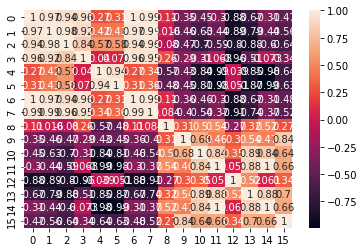

In [ ]:
samples = vae_beans.sample(10000)
df_beans = pd.DataFrame(samples).drop([16], axis=1).astype(float)
corrMatrix_beans = df_beans.corr()
sn.heatmap(corrMatrix_beans, annot=True)
plt.show()

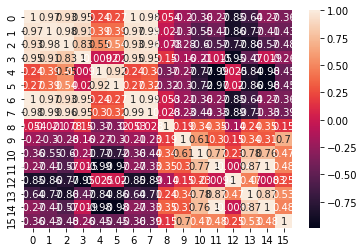

In [ ]:
d = beans
d = d.rename(columns={x:y for x,y in zip(d.columns,range(0,len(d.columns)))})
corr = d.corr()
sn.heatmap(corr, annot=True)
plt.show()

In [ ]:
distance(beans.corr(), df_beans.corr())

0.005012857695557027

In [ ]:
model = VAE()
data1, data2 = create_statistics(beans, model=model, target_column='Class', categorical_columns=['Class'], classification=True)

Epoch: 0, loss: 9608.38671875
Epoch: 10, loss: 3505.27783203125
Epoch: 20, loss: 3179.024169921875
Epoch: 30, loss: 3067.23291015625
Epoch: 40, loss: 3078.09765625
Epoch: 50, loss: 2985.03955078125
Epoch: 60, loss: 3135.877685546875
Epoch: 70, loss: 2907.94775390625
Epoch: 80, loss: 2860.01708984375
Epoch: 90, loss: 2961.79248046875
Epoch: 100, loss: 2982.63623046875
Epoch: 110, loss: 2960.495361328125
Epoch: 120, loss: 2851.73486328125
Epoch: 130, loss: 2999.39013671875
Epoch: 140, loss: 2928.15673828125
Epoch: 150, loss: 2905.364013671875
Epoch: 160, loss: 2858.974365234375
Epoch: 170, loss: 2832.84033203125
Epoch: 180, loss: 2926.50048828125
Epoch: 190, loss: 2918.987548828125
Epoch: 200, loss: 2760.77685546875
Epoch: 210, loss: 2877.93505859375
Epoch: 220, loss: 2828.826171875
Epoch: 230, loss: 2884.294921875
Epoch: 240, loss: 2939.73486328125
Epoch: 250, loss: 2958.009765625
Epoch: 260, loss: 2863.869140625
Epoch: 270, loss: 2881.3984375
Epoch: 280, loss: 2749.53564453125
Epoch: 2

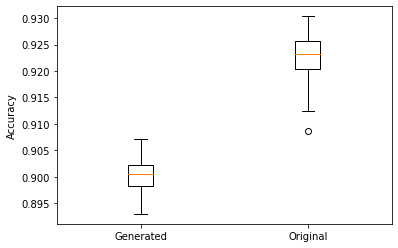

In [ ]:
plt.ylabel('Accuracy')
bp = plt.boxplot([data1, data2])
plt.xticks([1, 2], ['Generated', 'Original'])
plt.show()

In [ ]:
data1.mean()

0.900233634560282

In [ ]:
data2.mean()

0.9226946811636791

In [ ]:
model = VAE()
data1, data2 = create_statistics(beans, model=model, target_column='Class', categorical_columns=['Class'], classification=True, method='knn')

Epoch: 0, loss: 8982.6630859375
Epoch: 10, loss: 3392.8505859375
Epoch: 20, loss: 3343.1904296875
Epoch: 30, loss: 3168.1904296875
Epoch: 40, loss: 3025.535888671875
Epoch: 50, loss: 3136.88623046875
Epoch: 60, loss: 3020.668212890625
Epoch: 70, loss: 3038.68310546875
Epoch: 80, loss: 2907.1689453125
Epoch: 90, loss: 2917.930908203125
Epoch: 100, loss: 2909.80810546875
Epoch: 110, loss: 2916.672607421875
Epoch: 120, loss: 2896.3193359375
Epoch: 130, loss: 3028.0927734375
Epoch: 140, loss: 2794.380615234375
Epoch: 150, loss: 2932.5048828125
Epoch: 160, loss: 2899.459716796875
Epoch: 170, loss: 2828.357421875
Epoch: 180, loss: 2971.909912109375
Epoch: 190, loss: 2963.639892578125
Epoch: 200, loss: 2833.8212890625
Epoch: 210, loss: 2764.66748046875
Epoch: 220, loss: 2961.150634765625
Epoch: 230, loss: 2902.52001953125
Epoch: 240, loss: 2888.58154296875
Epoch: 250, loss: 2937.91943359375
Epoch: 260, loss: 2767.68798828125
Epoch: 270, loss: 2787.8828125
Epoch: 280, loss: 2840.41162109375
Ep

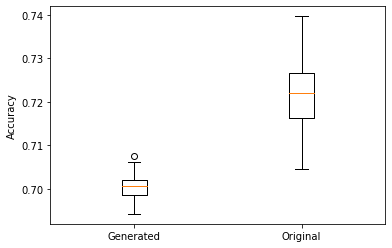

In [ ]:
plt.ylabel('Accuracy')
bp = plt.boxplot([data1, data2])
plt.xticks([1, 2], ['Generated', 'Original'])
plt.show()

In [ ]:
data1.mean()

0.7003585335390493

In [ ]:
data2.mean()

0.7217602115780194

# Real estate dataset

In [ ]:
url = 'https://raw.githubusercontent.com/JkbRnc/Data_Generators/main/datasets/real_estate.csv'
real_estate = pd.read_csv(url, sep=',')

In [ ]:
real_estate.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
real_estate_vae = VAE(e_params=[512], d_params=[512], num_epochs=300)

In [ ]:
real_estate_vae.fit(real_estate)

Epoch: 0, loss: 4732.8271484375
Epoch: 10, loss: 3433.82470703125
Epoch: 20, loss: 3114.9775390625
Epoch: 30, loss: 3077.361083984375
Epoch: 40, loss: 2902.5908203125
Epoch: 50, loss: 2926.45068359375
Epoch: 60, loss: 2811.03173828125
Epoch: 70, loss: 2669.184814453125
Epoch: 80, loss: 2744.842529296875
Epoch: 90, loss: 2712.27001953125
Epoch: 100, loss: 2710.4052734375
Epoch: 110, loss: 2663.146484375
Epoch: 120, loss: 2585.812744140625
Epoch: 130, loss: 2670.365234375
Epoch: 140, loss: 2623.19677734375
Epoch: 150, loss: 2601.49462890625
Epoch: 160, loss: 2595.278564453125
Epoch: 170, loss: 2551.6201171875
Epoch: 180, loss: 2519.43603515625
Epoch: 190, loss: 2603.276611328125
Epoch: 200, loss: 2525.89501953125
Epoch: 210, loss: 2411.662841796875
Epoch: 220, loss: 2503.06005859375
Epoch: 230, loss: 2382.5361328125
Epoch: 240, loss: 2502.294677734375
Epoch: 250, loss: 2413.90771484375
Epoch: 260, loss: 2470.390869140625
Epoch: 270, loss: 2397.145263671875
Epoch: 280, loss: 2403.18237304

In [ ]:
samples = real_estate_vae.sample(10000)

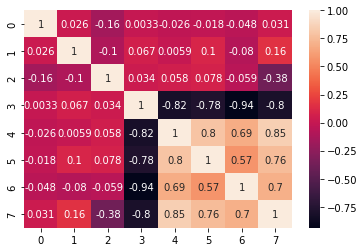

In [ ]:
df = pd.DataFrame(samples)
sn.heatmap(df.corr(), annot=True)
plt.show()

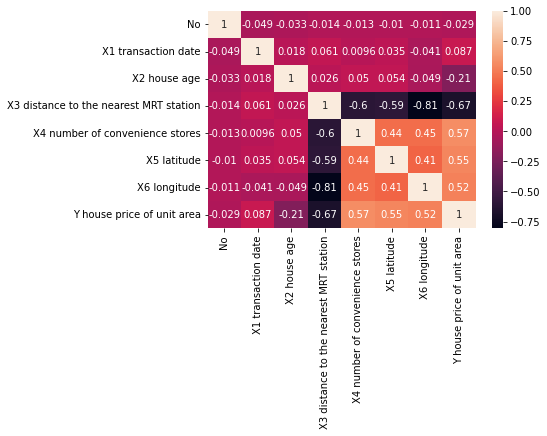

In [ ]:
sn.heatmap(real_estate.corr(), annot=True)

In [ ]:
distance(real_estate.corr(), df.corr())

0.01701349553031426

In [ ]:
model = VAE(latent_dim=32, d_params=[512], e_params=[512], num_epochs=800)
data1, data2 = create_statistics(real_estate, model=model, target_column='Y house price of unit area', sample_size=real_estate.shape[0])

Epoch: 0, loss: 4403.03662109375
Epoch: 10, loss: 3478.107666015625
Epoch: 20, loss: 3130.96923828125
Epoch: 30, loss: 3058.957763671875
Epoch: 40, loss: 2882.74658203125
Epoch: 50, loss: 2839.016357421875
Epoch: 60, loss: 2825.566162109375
Epoch: 70, loss: 2837.170166015625
Epoch: 80, loss: 2765.392578125
Epoch: 90, loss: 2691.17724609375
Epoch: 100, loss: 2744.467041015625
Epoch: 110, loss: 2695.44873046875
Epoch: 120, loss: 2623.8203125
Epoch: 130, loss: 2645.707275390625
Epoch: 140, loss: 2545.36328125
Epoch: 150, loss: 2496.46142578125
Epoch: 160, loss: 2506.3544921875
Epoch: 170, loss: 2497.125732421875
Epoch: 180, loss: 2440.5888671875
Epoch: 190, loss: 2483.522216796875
Epoch: 200, loss: 2437.22412109375
Epoch: 210, loss: 2409.75390625
Epoch: 220, loss: 2433.53759765625
Epoch: 230, loss: 2381.406494140625
Epoch: 240, loss: 2366.4033203125
Epoch: 250, loss: 2412.830078125
Epoch: 260, loss: 2339.992919921875
Epoch: 270, loss: 2333.56005859375
Epoch: 280, loss: 2319.7021484375
Epo

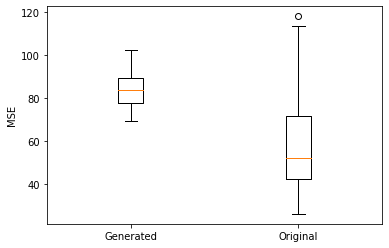

In [ ]:
plt.ylabel('MSE')
bp = plt.boxplot([data1, data2])
plt.xticks([1, 2], ['Generated', 'Original'])
plt.show()

In [ ]:
data1.mean()

83.80366347555915

In [ ]:
data2.mean()

59.64658155798075

In [ ]:
model = VAE(latent_dim=32, d_params=[512], e_params=[512], num_epochs=800)
data3, data4 = create_statistics(real_estate, model=model, target_column='Y house price of unit area', method='knn', sample_size=real_estate.shape[0])

Epoch: 0, loss: 4435.8505859375
Epoch: 10, loss: 3359.46728515625
Epoch: 20, loss: 3080.22998046875
Epoch: 30, loss: 2984.9365234375
Epoch: 40, loss: 2940.735107421875
Epoch: 50, loss: 2834.4140625
Epoch: 60, loss: 2795.66455078125
Epoch: 70, loss: 2719.18701171875
Epoch: 80, loss: 2759.166015625
Epoch: 90, loss: 2681.9697265625
Epoch: 100, loss: 2649.106201171875
Epoch: 110, loss: 2620.32861328125
Epoch: 120, loss: 2677.962890625
Epoch: 130, loss: 2663.09765625
Epoch: 140, loss: 2637.275146484375
Epoch: 150, loss: 2615.490478515625
Epoch: 160, loss: 2539.721923828125
Epoch: 170, loss: 2584.575927734375
Epoch: 180, loss: 2523.804931640625
Epoch: 190, loss: 2555.95703125
Epoch: 200, loss: 2437.648681640625
Epoch: 210, loss: 2427.9365234375
Epoch: 220, loss: 2416.602783203125
Epoch: 230, loss: 2384.93603515625
Epoch: 240, loss: 2466.51416015625
Epoch: 250, loss: 2416.2158203125
Epoch: 260, loss: 2431.858642578125
Epoch: 270, loss: 2373.612548828125
Epoch: 280, loss: 2374.57763671875
Epoc

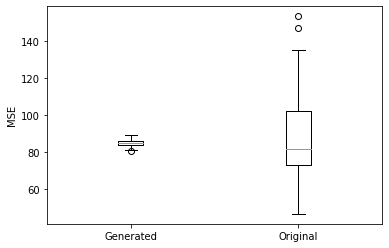

In [ ]:
plt.ylabel('MSE')
bp = plt.boxplot([data3, data4])
plt.xticks([1, 2], ['Generated', 'Original'])
plt.show()

In [ ]:
data3.mean()

84.84909838879638

In [ ]:
data4.mean()

86.92972915384615

# Breast cancer

In [ ]:
url = 'https://raw.githubusercontent.com/JkbRnc/Data_Generators/main/datasets/breast_cancer.csv'
bc =  pd.read_csv(url, sep=',')

In [ ]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [ ]:
bc_vae = VAE(e_params=[512], d_params=[512], num_epochs=500, latent_dim=128)

In [ ]:
bc_vae.fit(bc, ['Classification'])

Epoch: 0, loss: 2105.2939453125
Epoch: 10, loss: 1417.973876953125
Epoch: 20, loss: 1264.4014892578125
Epoch: 30, loss: 1143.265380859375
Epoch: 40, loss: 1071.3095703125
Epoch: 50, loss: 1046.02587890625
Epoch: 60, loss: 1036.035400390625
Epoch: 70, loss: 991.3009643554688
Epoch: 80, loss: 1029.964599609375
Epoch: 90, loss: 1017.7593994140625
Epoch: 100, loss: 947.1259765625
Epoch: 110, loss: 1029.616455078125
Epoch: 120, loss: 967.9925537109375
Epoch: 130, loss: 970.2063598632812
Epoch: 140, loss: 932.12646484375
Epoch: 150, loss: 927.7445678710938
Epoch: 160, loss: 928.3002319335938
Epoch: 170, loss: 887.1094360351562
Epoch: 180, loss: 955.0731811523438
Epoch: 190, loss: 876.0750732421875
Epoch: 200, loss: 870.6031494140625
Epoch: 210, loss: 894.9611206054688
Epoch: 220, loss: 880.4383544921875
Epoch: 230, loss: 931.9035034179688
Epoch: 240, loss: 922.73828125
Epoch: 250, loss: 861.9481201171875
Epoch: 260, loss: 890.7794799804688
Epoch: 270, loss: 883.6123046875
Epoch: 280, loss: 8

In [ ]:
samples = bc_vae.sample(10000)

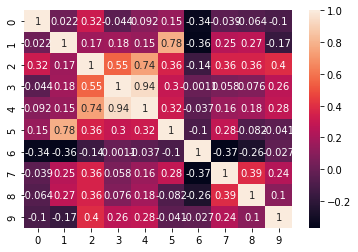

In [ ]:
df_bc = pd.DataFrame(samples)
sn.heatmap(df_bc.corr(), annot=True)
plt.show()

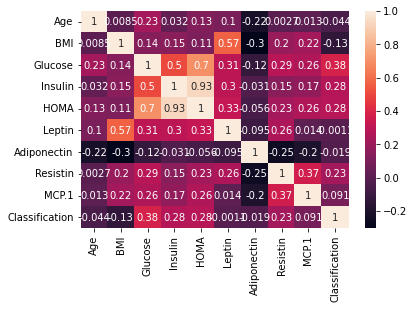

In [ ]:
sn.heatmap(bc.corr(), annot=True)
plt.show()

In [ ]:
distance(bc.corr(), df_bc.corr())

0.00696198909744039

In [ ]:
model = VAE(e_params=[512], d_params=[512], num_epochs=500)
data1, data2 = create_statistics(bc, 'Classification', model=model, categorical_columns=['Classification'], classification=True)

Epoch: 0, loss: 1470.69775390625
Epoch: 10, loss: 1216.00927734375
Epoch: 20, loss: 1083.20263671875
Epoch: 30, loss: 1028.00927734375
Epoch: 40, loss: 1026.1446533203125
Epoch: 50, loss: 965.3049926757812
Epoch: 60, loss: 949.974853515625
Epoch: 70, loss: 917.0872802734375
Epoch: 80, loss: 909.6575317382812
Epoch: 90, loss: 984.987548828125
Epoch: 100, loss: 877.3230590820312
Epoch: 110, loss: 894.212890625
Epoch: 120, loss: 891.7347412109375
Epoch: 130, loss: 874.6048583984375
Epoch: 140, loss: 849.05859375
Epoch: 150, loss: 878.3887329101562
Epoch: 160, loss: 894.685546875
Epoch: 170, loss: 876.552490234375
Epoch: 180, loss: 825.7814331054688
Epoch: 190, loss: 892.3677978515625
Epoch: 200, loss: 849.4224853515625
Epoch: 210, loss: 873.2769775390625
Epoch: 220, loss: 843.9232177734375
Epoch: 230, loss: 827.8575439453125
Epoch: 240, loss: 855.2939453125
Epoch: 250, loss: 817.6727905273438
Epoch: 260, loss: 771.534912109375
Epoch: 270, loss: 798.9729614257812
Epoch: 280, loss: 848.2838

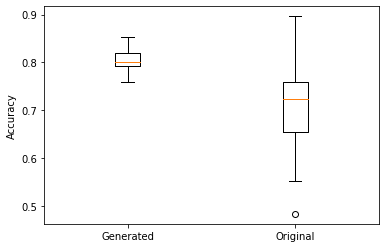

In [ ]:
plt.ylabel('Accuracy')
bp = plt.boxplot([data1, data2])
plt.xticks([1, 2], ['Generated', 'Original'])
plt.show()

In [ ]:
data1.mean()

0.8042241379310344

In [ ]:
data2.mean()

0.7110344827586207

In [ ]:
model = VAE(e_params=[512], d_params=[512], num_epochs=500)
data1, data2 = create_statistics(bc, 'Classification', model=model, categorical_columns=['Classification'], classification=True, method='knn')

Epoch: 0, loss: 1495.1197509765625
Epoch: 10, loss: 1187.45068359375
Epoch: 20, loss: 1059.0869140625
Epoch: 30, loss: 1019.1221313476562
Epoch: 40, loss: 1018.7535400390625
Epoch: 50, loss: 963.73046875
Epoch: 60, loss: 973.4035034179688
Epoch: 70, loss: 924.5424194335938
Epoch: 80, loss: 956.318603515625
Epoch: 90, loss: 887.146240234375
Epoch: 100, loss: 953.9990844726562
Epoch: 110, loss: 932.9742431640625
Epoch: 120, loss: 903.1773681640625
Epoch: 130, loss: 847.0213012695312
Epoch: 140, loss: 896.5787353515625
Epoch: 150, loss: 848.5802612304688
Epoch: 160, loss: 862.2431640625
Epoch: 170, loss: 857.3316040039062
Epoch: 180, loss: 822.2547607421875
Epoch: 190, loss: 853.24658203125
Epoch: 200, loss: 857.4405517578125
Epoch: 210, loss: 839.384033203125
Epoch: 220, loss: 790.5870361328125
Epoch: 230, loss: 780.185302734375
Epoch: 240, loss: 807.8299560546875
Epoch: 250, loss: 799.6015014648438
Epoch: 260, loss: 771.01513671875
Epoch: 270, loss: 833.236328125
Epoch: 280, loss: 799.8

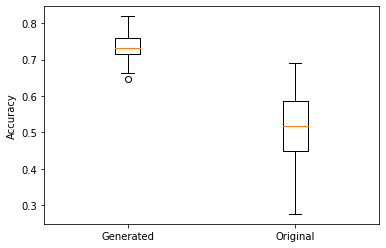

In [ ]:
plt.ylabel('Accuracy')
bp = plt.boxplot([data1, data2])
plt.xticks([1, 2], ['Generated', 'Original'])
plt.show()

In [ ]:
data1.mean()

0.7339655172413794

In [ ]:
data2.mean()

0.5151724137931033

# WSNs dataset

In [ ]:
url = 'https://raw.githubusercontent.com/JkbRnc/Data_Generators/main/datasets/wsns.csv'
wsns = pd.read_csv(url, sep=',')

In [ ]:
wsns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anchor_ratio  107 non-null    int64  
 1   trans_range   107 non-null    int64  
 2   node_density  107 non-null    int64  
 3   iterations    107 non-null    int64  
 4   ale           107 non-null    float64
 5   sd_ale        107 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 5.1 KB


In [ ]:
wsns.head()

,anchor_ratio,trans_range,node_density,iterations,ale,sd_ale
0,30,15,200,40,0.773546,0.250555
1,15,15,100,70,0.911941,0.498329
2,30,15,100,50,0.814867,0.255546
3,15,20,100,20,1.435332,0.394603
4,30,15,100,40,1.265909,0.302943


In [ ]:
wsns.shape

(107, 6)

In [ ]:
wsns = wsns.drop(['sd_ale'], axis=1)

In [ ]:
wsns_vae = VAE(e_params=[512], d_params=[512], num_epochs=500, latent_dim=128)

In [ ]:
wsns_vae.fit(wsns)

Epoch: 0, loss: 1512.554443359375
Epoch: 10, loss: 862.3853759765625
Epoch: 20, loss: 735.6954956054688
Epoch: 30, loss: 700.6650390625
Epoch: 40, loss: 657.61474609375
Epoch: 50, loss: 639.90576171875
Epoch: 60, loss: 579.026123046875
Epoch: 70, loss: 602.9920654296875
Epoch: 80, loss: 574.1097412109375
Epoch: 90, loss: 595.7646484375
Epoch: 100, loss: 529.2242431640625
Epoch: 110, loss: 522.6083984375
Epoch: 120, loss: 556.6065063476562
Epoch: 130, loss: 499.96246337890625
Epoch: 140, loss: 527.6839599609375
Epoch: 150, loss: 508.6343078613281
Epoch: 160, loss: 535.3065185546875
Epoch: 170, loss: 528.5819702148438
Epoch: 180, loss: 522.9501953125
Epoch: 190, loss: 484.10943603515625
Epoch: 200, loss: 491.26531982421875
Epoch: 210, loss: 501.97344970703125
Epoch: 220, loss: 495.92193603515625
Epoch: 230, loss: 471.2870178222656
Epoch: 240, loss: 492.15240478515625
Epoch: 250, loss: 441.26885986328125
Epoch: 260, loss: 480.35626220703125
Epoch: 270, loss: 454.1522216796875
Epoch: 280, 

In [ ]:
samples = wsns_vae.sample(10000)

In [ ]:
df = pd.DataFrame(samples)

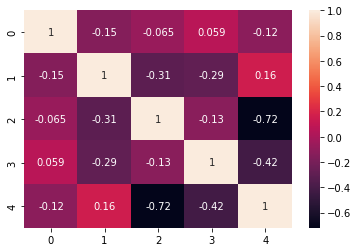

In [ ]:
sn.heatmap(df.corr(), annot=True)
plt.show()

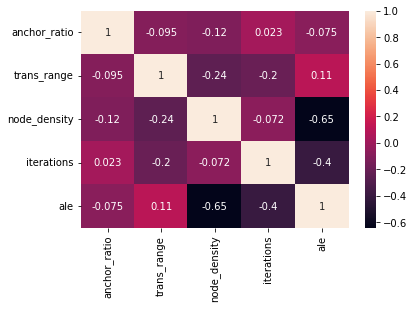

In [ ]:
sn.heatmap(wsns.corr(), annot=True)
plt.show()

In [ ]:
distance(wsns.corr(), df.corr())

0.011158158741851458

In [ ]:
x, y = evaluate_randomforest(wsns, df, 'ale', classification=False)

In [ ]:
x

0.04710831471354409

In [ ]:
y

0.043006137846369814

In [ ]:
model = VAE(e_params=[512], d_params=[512], num_epochs=500)
data1, data2 = create_statistics(wsns, 'ale', model=model, classification=False)

Epoch: 0, loss: 817.8277587890625
Epoch: 10, loss: 636.3301391601562
Epoch: 20, loss: 594.795654296875
Epoch: 30, loss: 538.33837890625
Epoch: 40, loss: 540.4837036132812
Epoch: 50, loss: 529.234130859375
Epoch: 60, loss: 488.1993408203125
Epoch: 70, loss: 521.0964965820312
Epoch: 80, loss: 511.59539794921875
Epoch: 90, loss: 504.37286376953125
Epoch: 100, loss: 486.3082275390625
Epoch: 110, loss: 465.83184814453125
Epoch: 120, loss: 468.84344482421875
Epoch: 130, loss: 500.218017578125
Epoch: 140, loss: 500.1390380859375
Epoch: 150, loss: 478.7340087890625
Epoch: 160, loss: 491.76226806640625
Epoch: 170, loss: 470.53839111328125
Epoch: 180, loss: 462.345703125
Epoch: 190, loss: 499.7544250488281
Epoch: 200, loss: 454.4775085449219
Epoch: 210, loss: 451.91949462890625
Epoch: 220, loss: 481.9659423828125
Epoch: 230, loss: 448.0078430175781
Epoch: 240, loss: 459.95758056640625
Epoch: 250, loss: 444.2441101074219
Epoch: 260, loss: 442.3925476074219
Epoch: 270, loss: 438.28753662109375
Epo

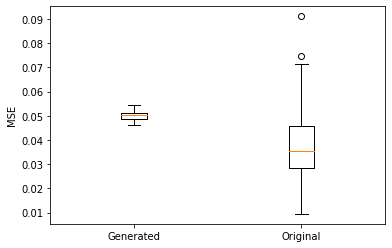

In [ ]:
plt.ylabel('MSE')
bp = plt.boxplot([data1, data2])
plt.xticks([1, 2], ['Generated', 'Original'])
plt.show()

In [ ]:
data1.mean()

0.05013079497123081

In [ ]:
data2.mean()

0.03930462104006397

In [ ]:
model = VAE(e_params=[512], d_params=[512], num_epochs=500)
data1, data2 = create_statistics(wsns, 'ale', model=model, classification=False, method='knn')

Epoch: 0, loss: 794.2371826171875
Epoch: 10, loss: 604.468505859375
Epoch: 20, loss: 580.3984375
Epoch: 30, loss: 544.845703125
Epoch: 40, loss: 518.1905517578125
Epoch: 50, loss: 508.6455993652344
Epoch: 60, loss: 507.517578125
Epoch: 70, loss: 545.2733154296875
Epoch: 80, loss: 492.77667236328125
Epoch: 90, loss: 504.1239929199219
Epoch: 100, loss: 505.2940979003906
Epoch: 110, loss: 510.02362060546875
Epoch: 120, loss: 459.39630126953125
Epoch: 130, loss: 455.96551513671875
Epoch: 140, loss: 494.3356018066406
Epoch: 150, loss: 473.77130126953125
Epoch: 160, loss: 480.434326171875
Epoch: 170, loss: 453.155517578125
Epoch: 180, loss: 448.22296142578125
Epoch: 190, loss: 477.9871520996094
Epoch: 200, loss: 467.31060791015625
Epoch: 210, loss: 448.59637451171875
Epoch: 220, loss: 425.47711181640625
Epoch: 230, loss: 467.5467834472656
Epoch: 240, loss: 453.9293212890625
Epoch: 250, loss: 446.51739501953125
Epoch: 260, loss: 427.15875244140625
Epoch: 270, loss: 454.316162109375
Epoch: 280

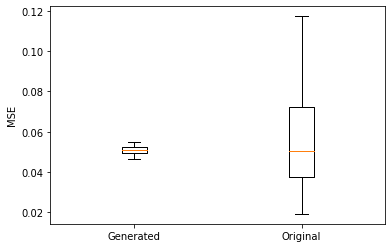

In [ ]:
plt.ylabel('MSE')
bp = plt.boxplot([data1, data2])
plt.xticks([1, 2], ['Generated', 'Original'])
plt.show()

In [ ]:
data1.mean()

0.05087582970080232

In [ ]:
data2.mean()

0.05555663925060037

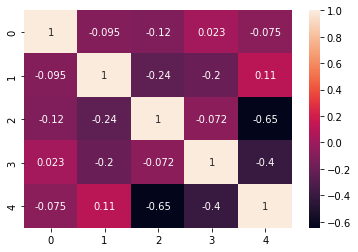

In [ ]:
d = wsns
d = d.rename(columns={x:y for x,y in zip(d.columns,range(0,len(d.columns)))})
sn.heatmap(d.corr(), annot=True)
plt.show()